In [4]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, probplot

In [5]:
# Cargamos el dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [6]:
# Mostramos las primeras 5 filas del dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# 1.1. Análisis de Tablas Cruzadas
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)
top_categories = crosstab_prop.sort_values(by=True, ascending=False).head(5)
print("Top categorías con mayor proporción de best-sellers:")
print(top_categories)

Top categorías con mayor proporción de best-sellers:
isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339


In [8]:
# 1.2. Pruebas Estadísticas
chi2, p, dof, ex = chi2_contingency(crosstab)
cramers_v = (chi2 / (df.shape[0] * (min(crosstab.shape) - 1))) ** 0.5
print(f"Chi-cuadrado: {chi2}, p-valor: {p}, V de Cramér: {cramers_v}")

Chi-cuadrado: 36540.20270061387, p-valor: 0.0, V de Cramér: 0.1222829439760564


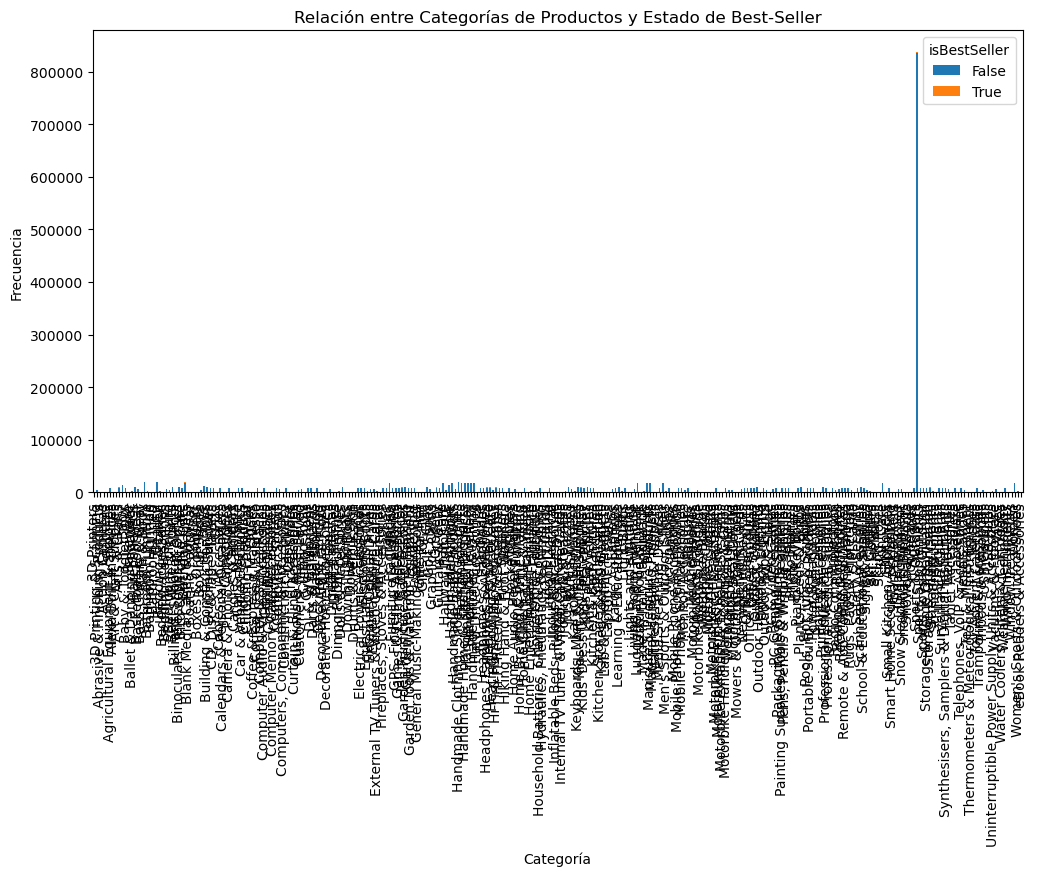

In [11]:
# Gráfico de barras apiladas para la relación entre categorías de productos y estado de best-seller
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre Categorías de Productos y Estado de Best-Seller')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

Top 10 categorías con mayor proporción de best-sellers:
isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
Billiard, Snooker & Pool        0.967871  0.032129
Pet Supplies                    0.969800  0.030200
Home Brewing & Wine Making      0.971545  0.028455
Wind Instruments                0.972000  0.028000
Mirrors                         0.972000  0.028000


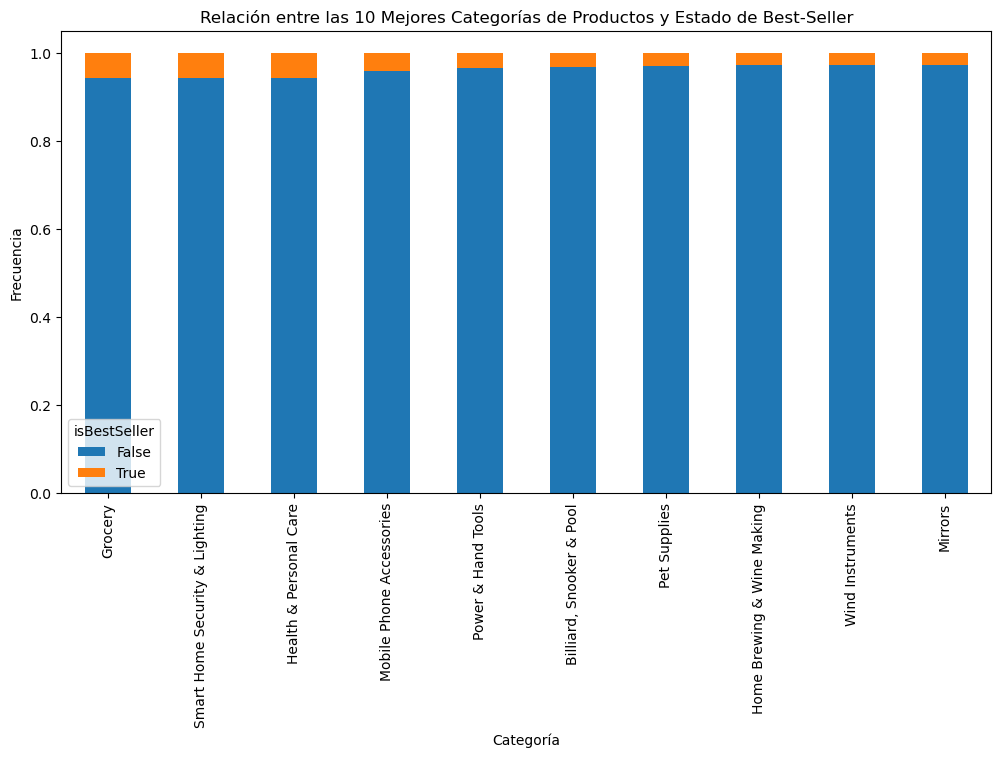

In [33]:
# Filtrar las 10 mejores categorías con mayor proporción de best-sellers
top_10_categories = crosstab_prop.sort_values(by=True, ascending=False).head(10)
print("Top 10 categorías con mayor proporción de best-sellers:")
print(top_10_categories)

# Gráfico de barras apiladas para la relación entre las 10 mejores categorías de productos y estado de best-seller
top_10_categories.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre las 10 Mejores Categorías de Productos y Estado de Best-Seller')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
# 2.0. Paso Preliminar: Eliminar Valores Atípicos en los Precios de los Productos
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

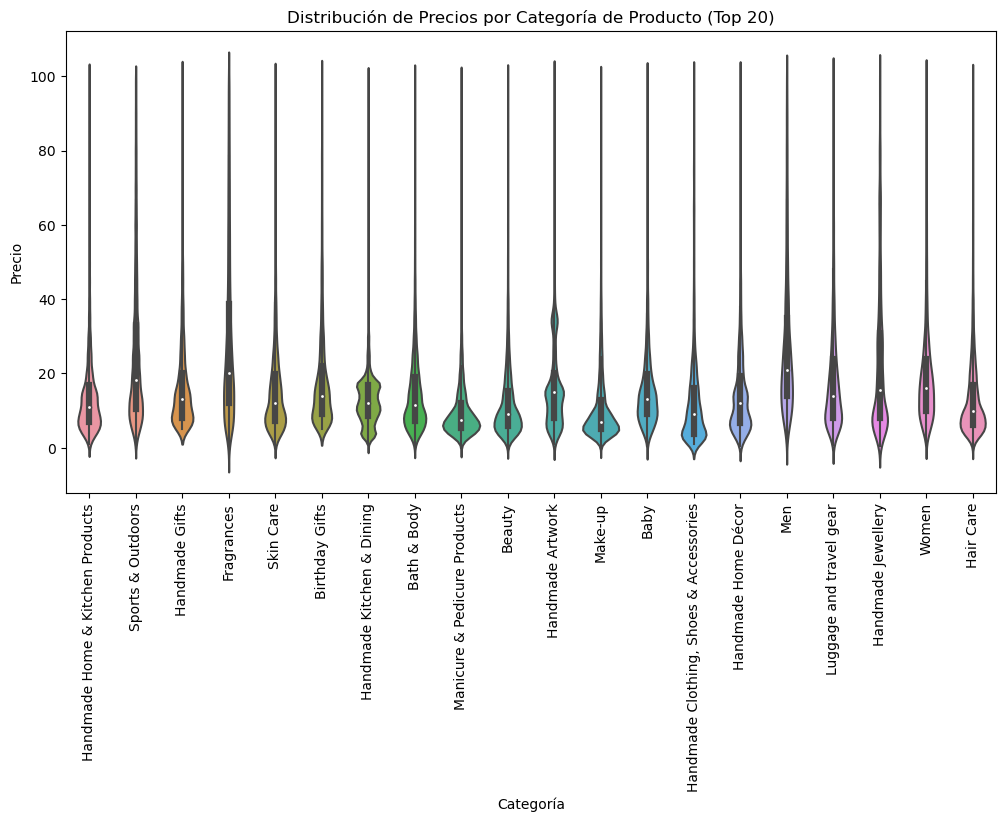

La categoría de producto con el precio mediano más alto es: Desktop PCs


In [32]:
# 2.1. Gráficos de Violín
# Calcular el conteo de cada categoría
category_counts = df['category'].value_counts()

# Filtrar las 20 categorías principales por conteo
top_20_categories = category_counts.nlargest(20).index
df_top_20 = df[df['category'].isin(top_20_categories)]

# Gráficos de Violín para las 20 categorías principales
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.title('Distribución de Precios por Categoría de Producto (Top 20)')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()


# Encontrar la categoría con el precio mediano más alto
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_category = median_prices.idxmax()
print(f"La categoría de producto con el precio mediano más alto es: {highest_median_category}")

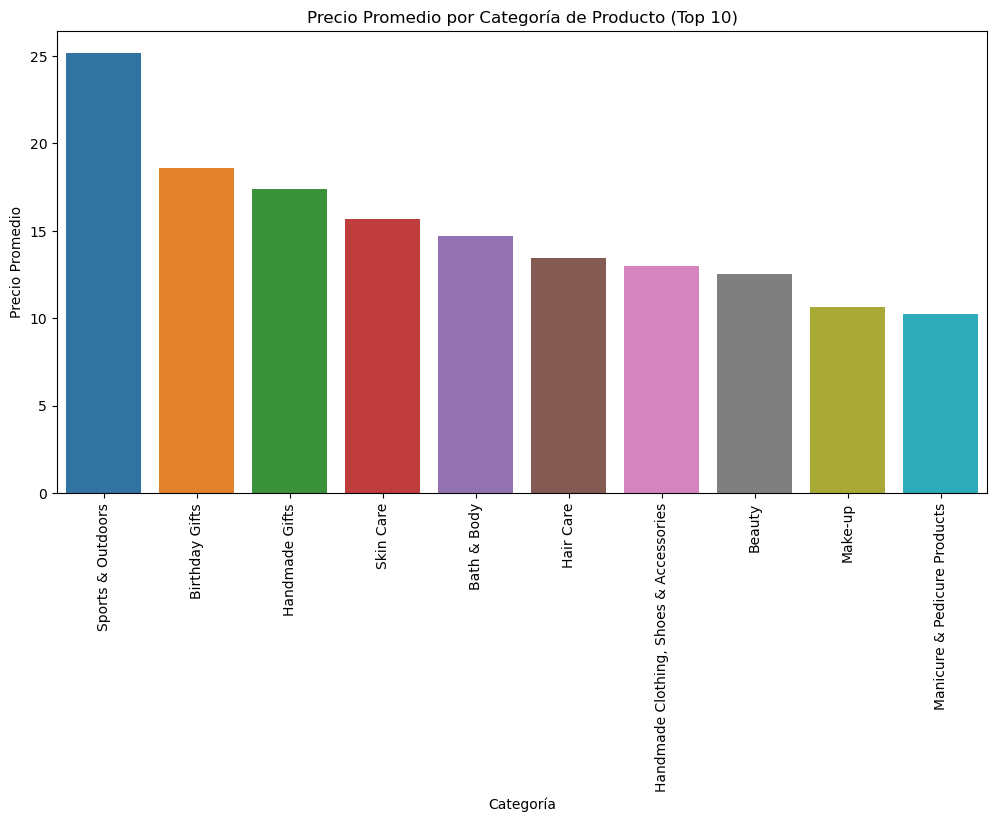

In [17]:
# 2.2. Gráficos de Barras
top_10_categories = df['category'].value_counts().head(10).index
avg_price_top_10 = df[df['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values)
plt.title('Precio Promedio por Categoría de Producto (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=90)
plt.show()

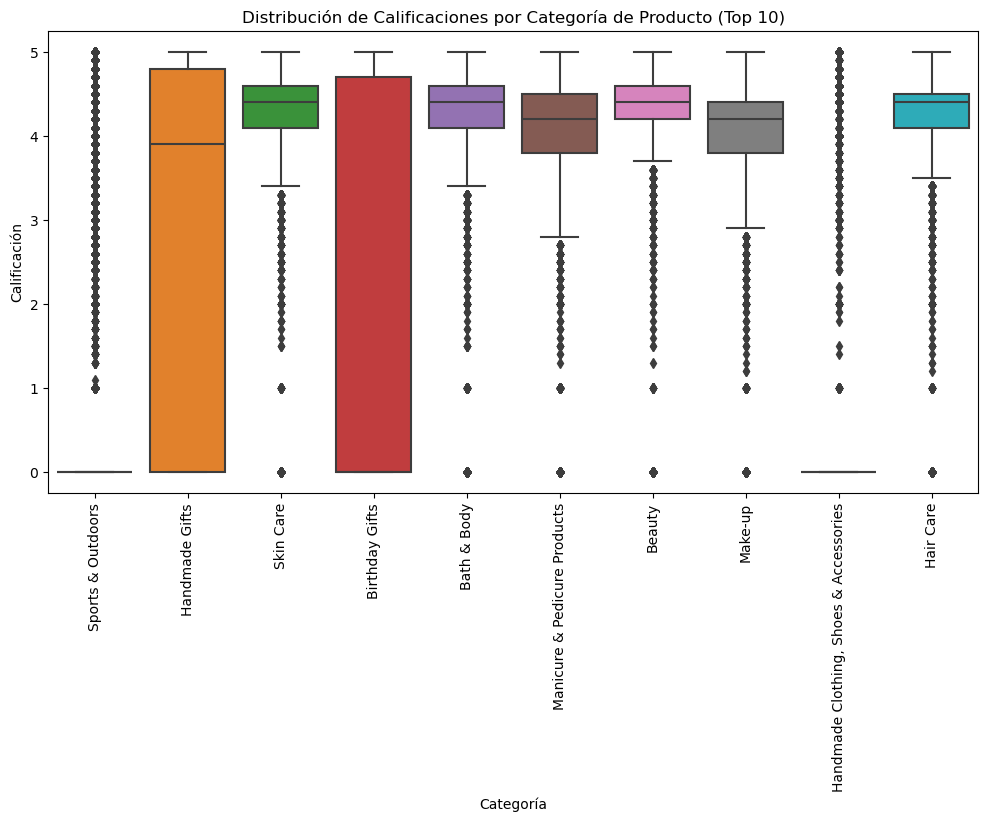

In [19]:
# 2.3. Diagramas de Caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_10_categories)])
plt.title('Distribución de Calificaciones por Categoría de Producto (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=90)
plt.show()

In [21]:
# 3.1. Coeficientes de Correlación
correlation, p_value = pearsonr(df['price'], df['stars'])
print(f"Coeficiente de correlación entre precio y calificación: {correlation}, p-valor: {p_value}")

Coeficiente de correlación entre precio y calificación: -0.07767299878172906, p-valor: 0.0


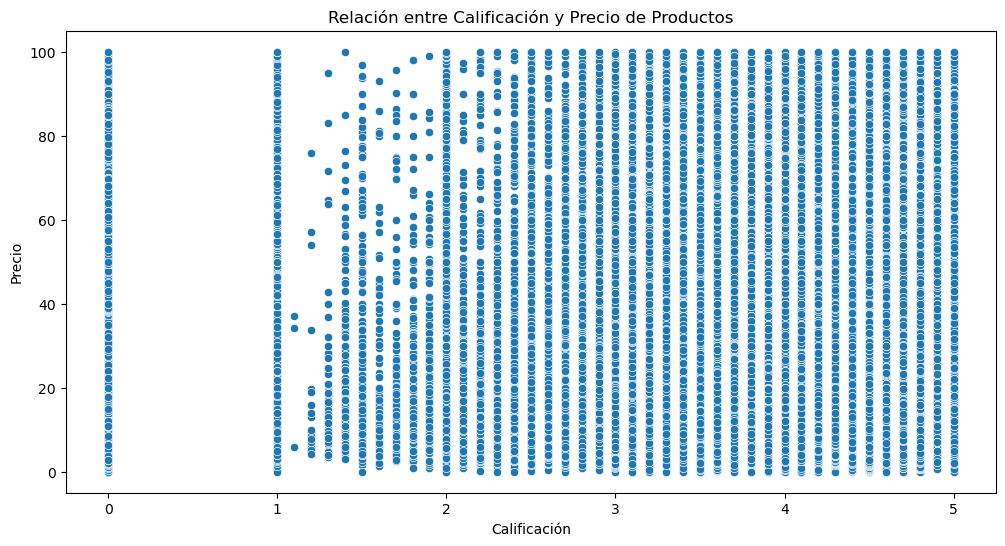

In [23]:
# Gráfico de dispersión para la relación entre calificación y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stars', y='price', data=df)
plt.title('Relación entre Calificación y Precio de Productos')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.show()

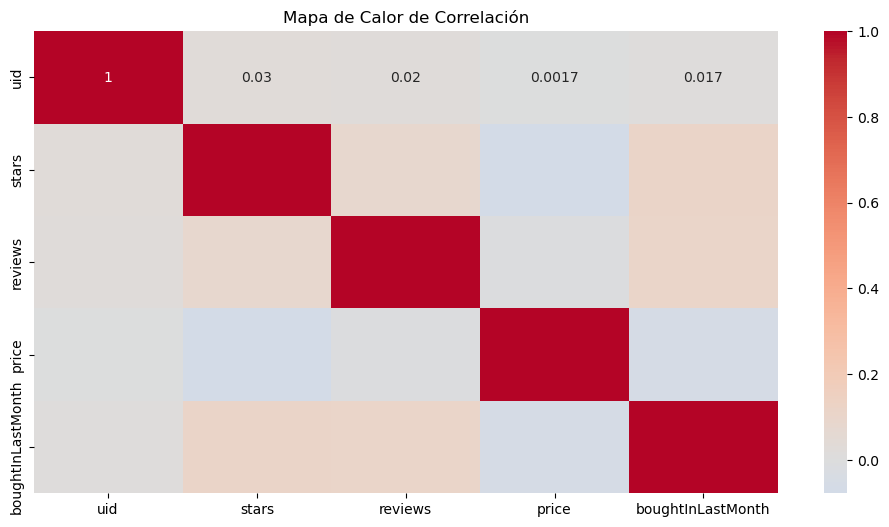

                        uid     stars   reviews     price  boughtInLastMonth
uid                1.000000  0.030288  0.020236  0.001717           0.017116
stars              0.030288  1.000000  0.083920 -0.077673           0.113994
reviews            0.020236  0.083920  1.000000 -0.008498           0.105624
price              0.001717 -0.077673 -0.008498  1.000000          -0.059051
boughtInLastMonth  0.017116  0.113994  0.105624 -0.059051           1.000000


In [31]:
# Mapa de calor de correlación con las variables numéricas con y sin el mapa de calor
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()

print(numeric_df.corr())


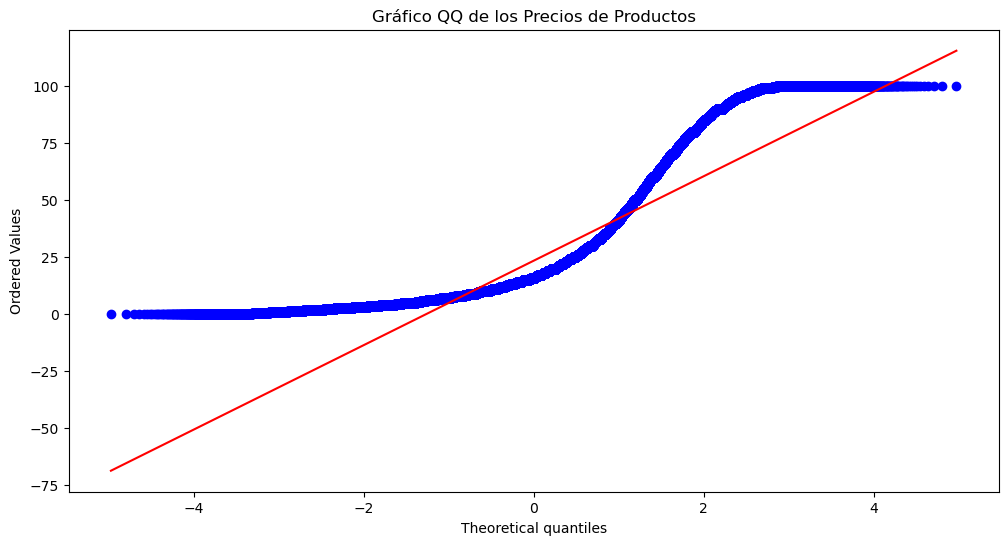

In [27]:
# Gráfico QQ para examinar la normalidad de los precios
plt.figure(figsize=(12, 6))
probplot(df['price'], dist="norm", plot=plt)
plt.title('Gráfico QQ de los Precios de Productos')
plt.show()